# Chapter 4 : Classification
Solved in Python rather than R.

In [25]:
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

## Question 10
Uses 'Weekly' dataset

In [26]:
weekly=pd.read_csv('data/Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [27]:
weekly.dtypes

Year           int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Volume       float64
Today        float64
Direction     object
dtype: object

In [28]:
weekly.isna().any()

Year         False
Lag1         False
Lag2         False
Lag3         False
Lag4         False
Lag5         False
Volume       False
Today        False
Direction    False
dtype: bool

In [29]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


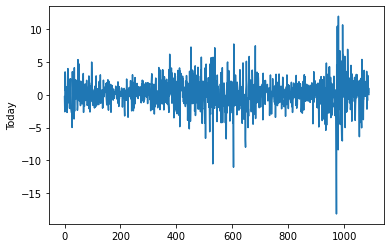

In [30]:
sns.lineplot(x=weekly.index,y='Today',data=weekly)

Assigning a class of 1 to Up and 0 to Down direction.

In [31]:
weekly['Up']=1*(weekly['Direction']=='Up')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


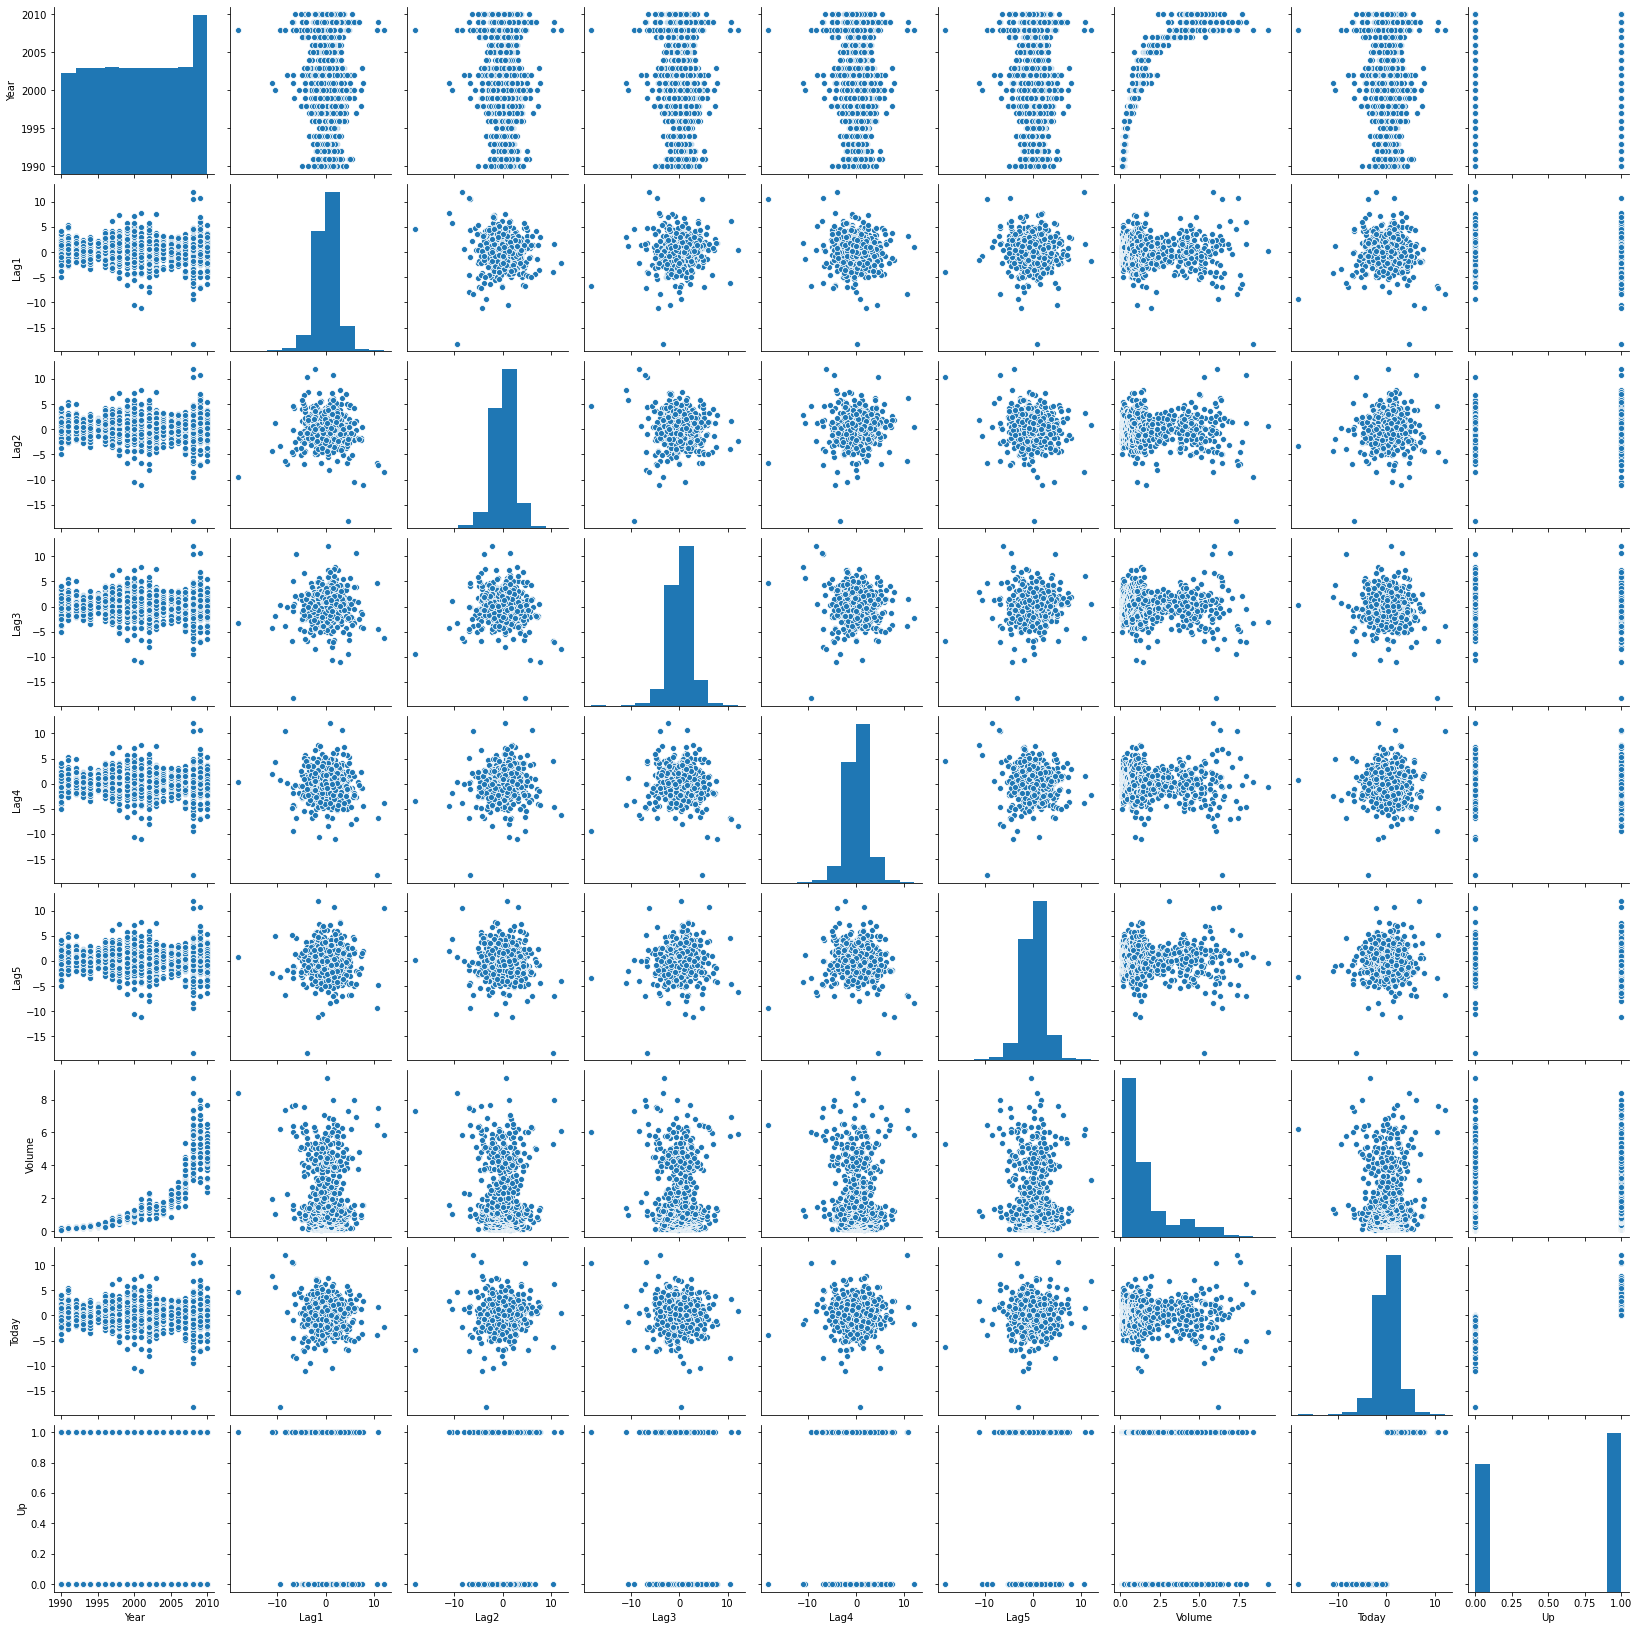

In [32]:
sns.pairplot(weekly)

### Model 1: Logit on whole

In [33]:
model_1=smf.logit('Up ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume',data=weekly).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 May 2020   Pseudo R-squ.:                0.006580
Time:                        17:09:09   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Only the predictor `Lag2` seems to be statistically significant

### Confusion matrix

In [34]:
print(model_1.pred_table())
#(i,j)th entry is the number of times i was observed and j was predicited

#extracting values for convenience
tn, fp, fn, tp = model_1.pred_table().ravel()

[[ 54. 430.]
 [ 48. 557.]]


In [35]:
print(f'Overall Error rate: {(fp+fn)/(tn+fn+fp+tp)} ') #proportion of incorrect predictions out of total
print(f'False Positive rate: {fp/(fp+tn)}') #proportion of predicted positives out of actual negatives
print(f'Precision: {tp/(fp+tp)}') #proportion of correctly predicted positives of predicted positives
print(f'Recall: {tp/(tp+fn)}') #proportion of correctly predicted postives out of actual positives
print(f'Proportion of positives: {(tp+fn)/(tp+fn+tn+fp)}')

Overall Error rate: 0.4389348025711662 
False Positive rate: 0.8884297520661157
Precision: 0.5643363728470111
Recall: 0.9206611570247933
Proportion of positives: 0.5555555555555556


### Inferences
- The model has a high recall/sensitivity, was able to predict 92% of the Up stocks correctly  
- It fares considerably worse for Down stocks, predicting 89% of them incorrectly
- Overall error rate (0.43) is a bit less than what we would get by a naive model of guessing Up everytime(0.44)

A false positive rate this high might be problematic in the context of stock market investing

### Train/Test split

In [36]:
train=weekly.query('Year <= 2008')
test=weekly.query('Year > 2008')

### Model 2: Logit

In [37]:
model_2=smf.logit('Up ~ Lag2',data=train).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 May 2020   Pseudo R-squ.:                0.003076
Time:                        17:09:09   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [38]:
threshold=0.5
pred2=np.greater_equal(model_2.predict(test),threshold)*1
print(confusion_matrix(test['Up'],pred))
tn, fp, fn, tp= confusion_matrix(test['Up'],pred2).ravel()

NameError: name 'pred' is not defined

In [ ]:
print(f'Overall Accuracy: {(tn+tp)/(tn+fp+fn+tp)}')
print(f'Precision: {tp/(tp+fp)}')
print(f'False Postive rate: {fp/(fp+tn)}')

### Model 3: LDA

In [ ]:
X=train['Lag2'].values.reshape(-1,1)
y=train['Up']

model_3=LinearDiscriminantAnalysis()
model_3.fit(X,y)

In [ ]:
pred3=model_3.predict(test['Lag2'].values.reshape(-1,1))
print(confusion_matrix(test['Up'],pred3))
tn, fp, fn, tp= confusion_matrix(test['Up'],pred3).ravel()

In [ ]:
print(f'Overall Accuracy: {(tn+tp)/(tn+fp+fn+tp)}')
print(f'Precision: {tp/(tp+fp)}')
print(f'False Postive rate: {fp/(fp+tn)}')

### Model 4: QDA

In [ ]:
X=train['Lag2'].values.reshape(-1,1)
y=train['Up']

model_4=QuadraticDiscriminantAnalysis()
model_4.fit(X,y)

In [ ]:
pred4=model_4.predict(test['Lag2'].values.reshape(-1,1))
print(confusion_matrix(test['Up'],pred4))
tn, fp, fn, tp= confusion_matrix(test['Up'],pred4).ravel()

In [ ]:
print(f'Overall Accuracy: {(tn+tp)/(tn+fp+fn+tp)}')
print(f'Precision: {tp/(tp+fp)}')
print(f'False Postive rate: {fp/(fp+tn)}')

### Model 5: KNN Classifier

In [ ]:
X=train['Lag2'].values.reshape(-1,1)
y=train['Up']

K=10
model_5=KNeighborsClassifier(n_neighbors=K)
model_5.fit(X,y)

In [ ]:
pred5=model_5.predict(test['Lag2'].values.reshape(-1,1))
print(confusion_matrix(test['Up'],pred5))
tn, fp, fn, tp= confusion_matrix(test['Up'],pred5).ravel()

In [ ]:
print(f'Overall Accuracy: {(tn+tp)/(tn+fp+fn+tp)}')
print(f'Precision: {tp/(tp+fp)}')
print(f'False Postive rate: {fp/(fp+tn)}')

## Question 11
Uses the 'Auto' dataset

In [39]:
Auto=pd.read_csv('data/Auto.csv')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [40]:
#Preprocessing
cl_Auto=Auto.query('horsepower.str.isnumeric()').astype({'horsepower':'int64'}).reset_index(drop=True)
print(cl_Auto.describe())

cl_Auto['mpg01']=(cl_Auto['mpg']>=cl_Auto['mpg'].median())*1
cl_Auto.head()

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [41]:
cl_Auto['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

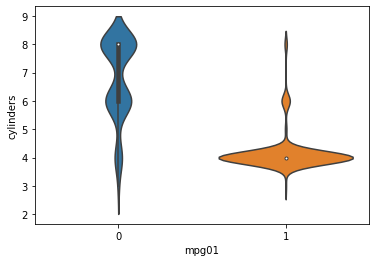

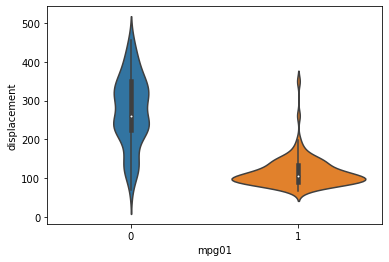

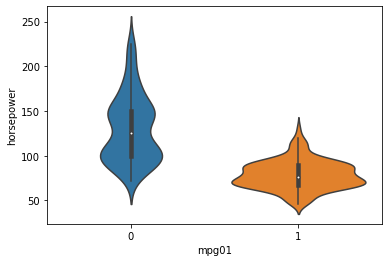

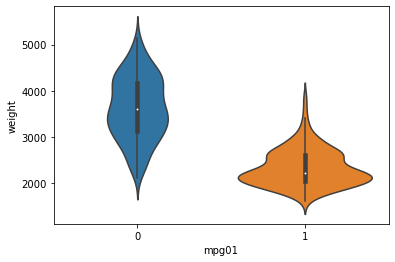

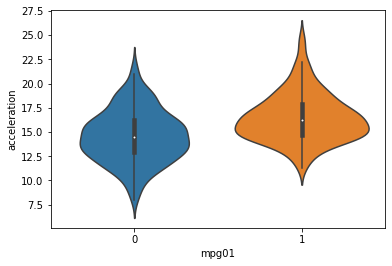

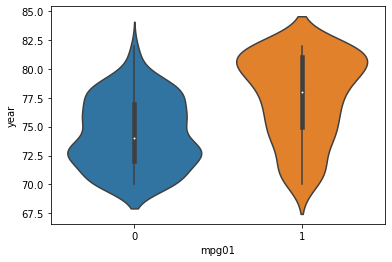

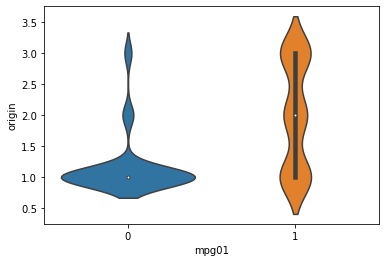

In [42]:
for col in cl_Auto.drop(columns=['name','mpg','mpg01']).columns:
    sns.violinplot(x='mpg01',y=col,data=cl_Auto)
    plt.show()

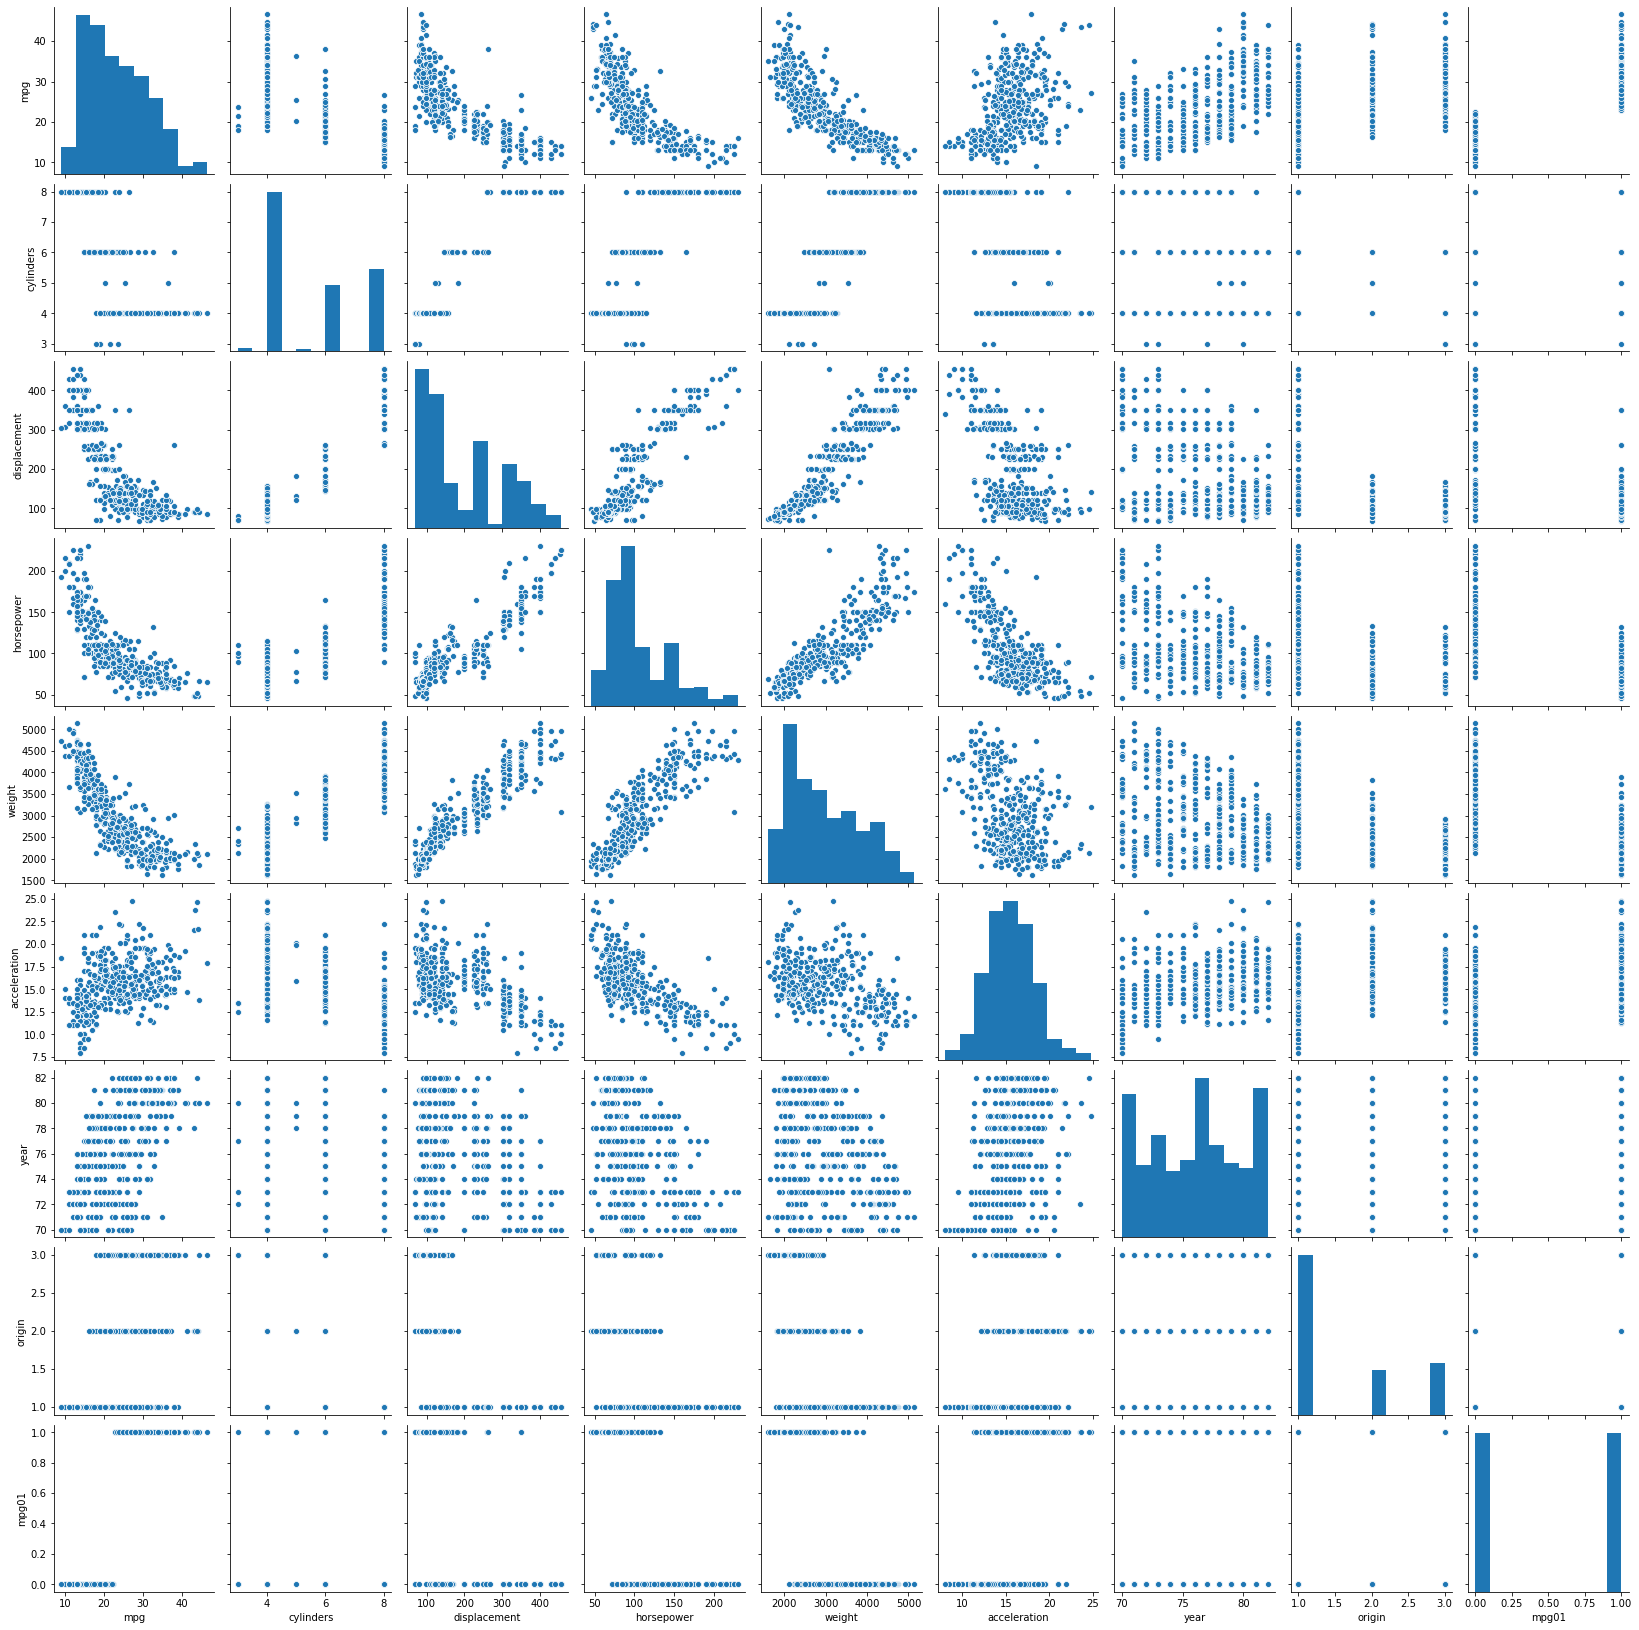

In [43]:
sns.pairplot(cl_Auto)

Weight and Displacement seem to be the most promising for prediciton. Cylinders too maybe?
### Train/Test Split

In [59]:
X=cl_Auto[['weight','displacement']]
y=cl_Auto['mpg01']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10)

### LDA

In [109]:
lda_model=LinearDiscriminantAnalysis().fit(X_train,y_train)

In [61]:
lda_pred=lda_model.predict(X_test)

print(confusion_matrix(y_test,lda_pred))
tn, fp, fn, tp= confusion_matrix(y_test,lda_pred).ravel()

lda_error=(tp+tn)/(tp+tn+fn+fp)
print(f'Overall Accuracy: {lda_error}')

[[39  7]
 [ 2 31]]
Overall Accuracy: 0.8860759493670886


### QDA

In [62]:
qda_model=QuadraticDiscriminantAnalysis().fit(X_train,y_train)

In [63]:
qda_pred=qda_model.predict(X_test)

print(confusion_matrix(y_test,qda_pred))
tn, fp, fn, tp= confusion_matrix(y_test,qda_pred).ravel()

qda_error=(tp+tn)/(tp+tn+fn+fp)
print(f'Overall Accuracy: {qda_error}')

[[43  3]
 [ 5 28]]
Overall Accuracy: 0.8987341772151899


### KNN

In [84]:
K=12
knn_model=KNeighborsClassifier(n_neighbors=K,).fit(X_train,y_train)

In [85]:
knn_pred=knn_model.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
tn, fp, fn, tp= confusion_matrix(y_test,knn_pred).ravel()

knn_error=(tp+tn)/(tp+tn+fn+fp)
print(f'Overall Accuracy: {knn_error}')

[[43  3]
 [ 3 30]]
Overall Accuracy: 0.9240506329113924


## Question 13
Uses `Boston` dataset

In [86]:
Boston=pd.read_csv('data/Boston.csv')
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [87]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [89]:
Boston['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [101]:
Boston['crim01']=(Boston['crim']>Boston['crim'].median())*1

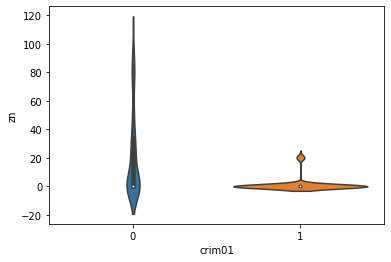

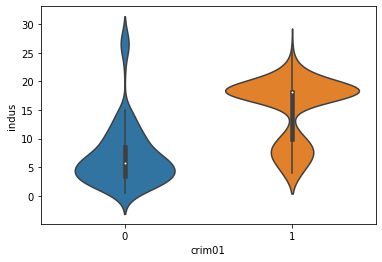

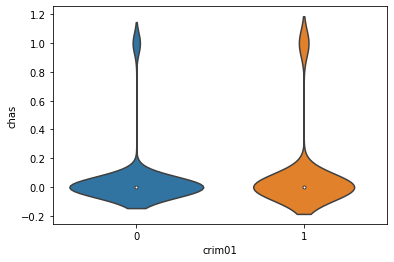

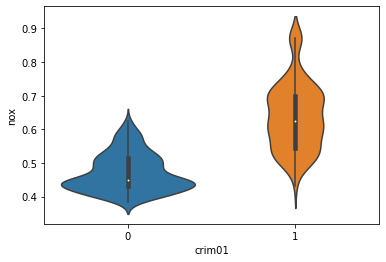

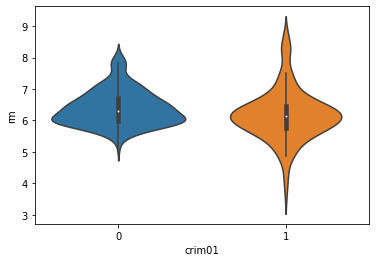

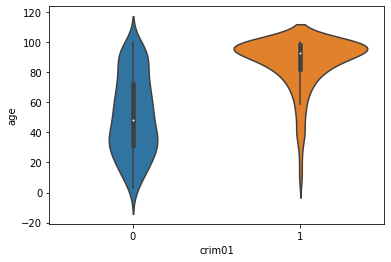

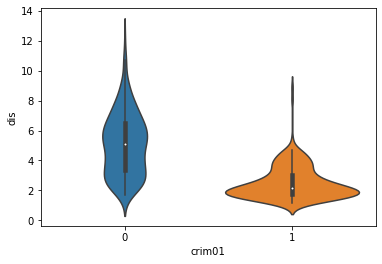

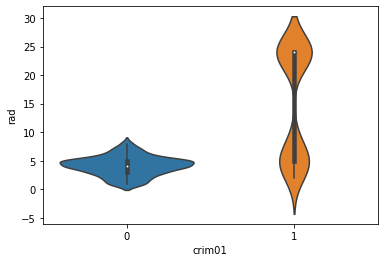

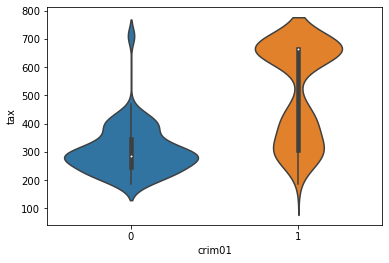

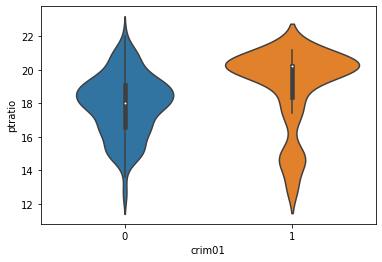

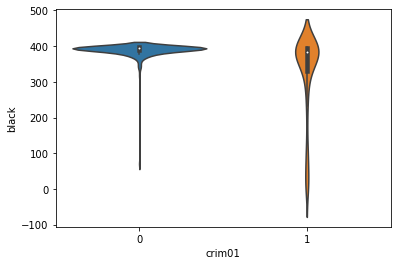

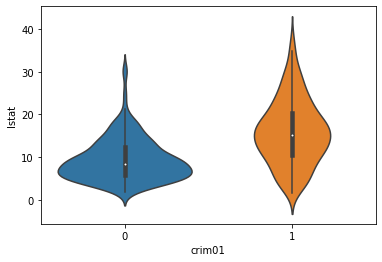

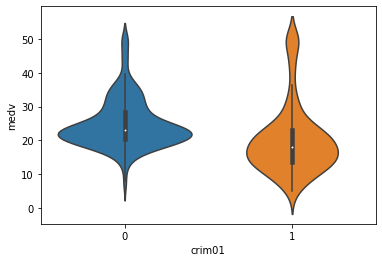

In [102]:
for col in Boston.drop(columns=['crim','crim01']).columns:
    sns.violinplot(x='crim01',y=col,data=Boston)
    plt.show()

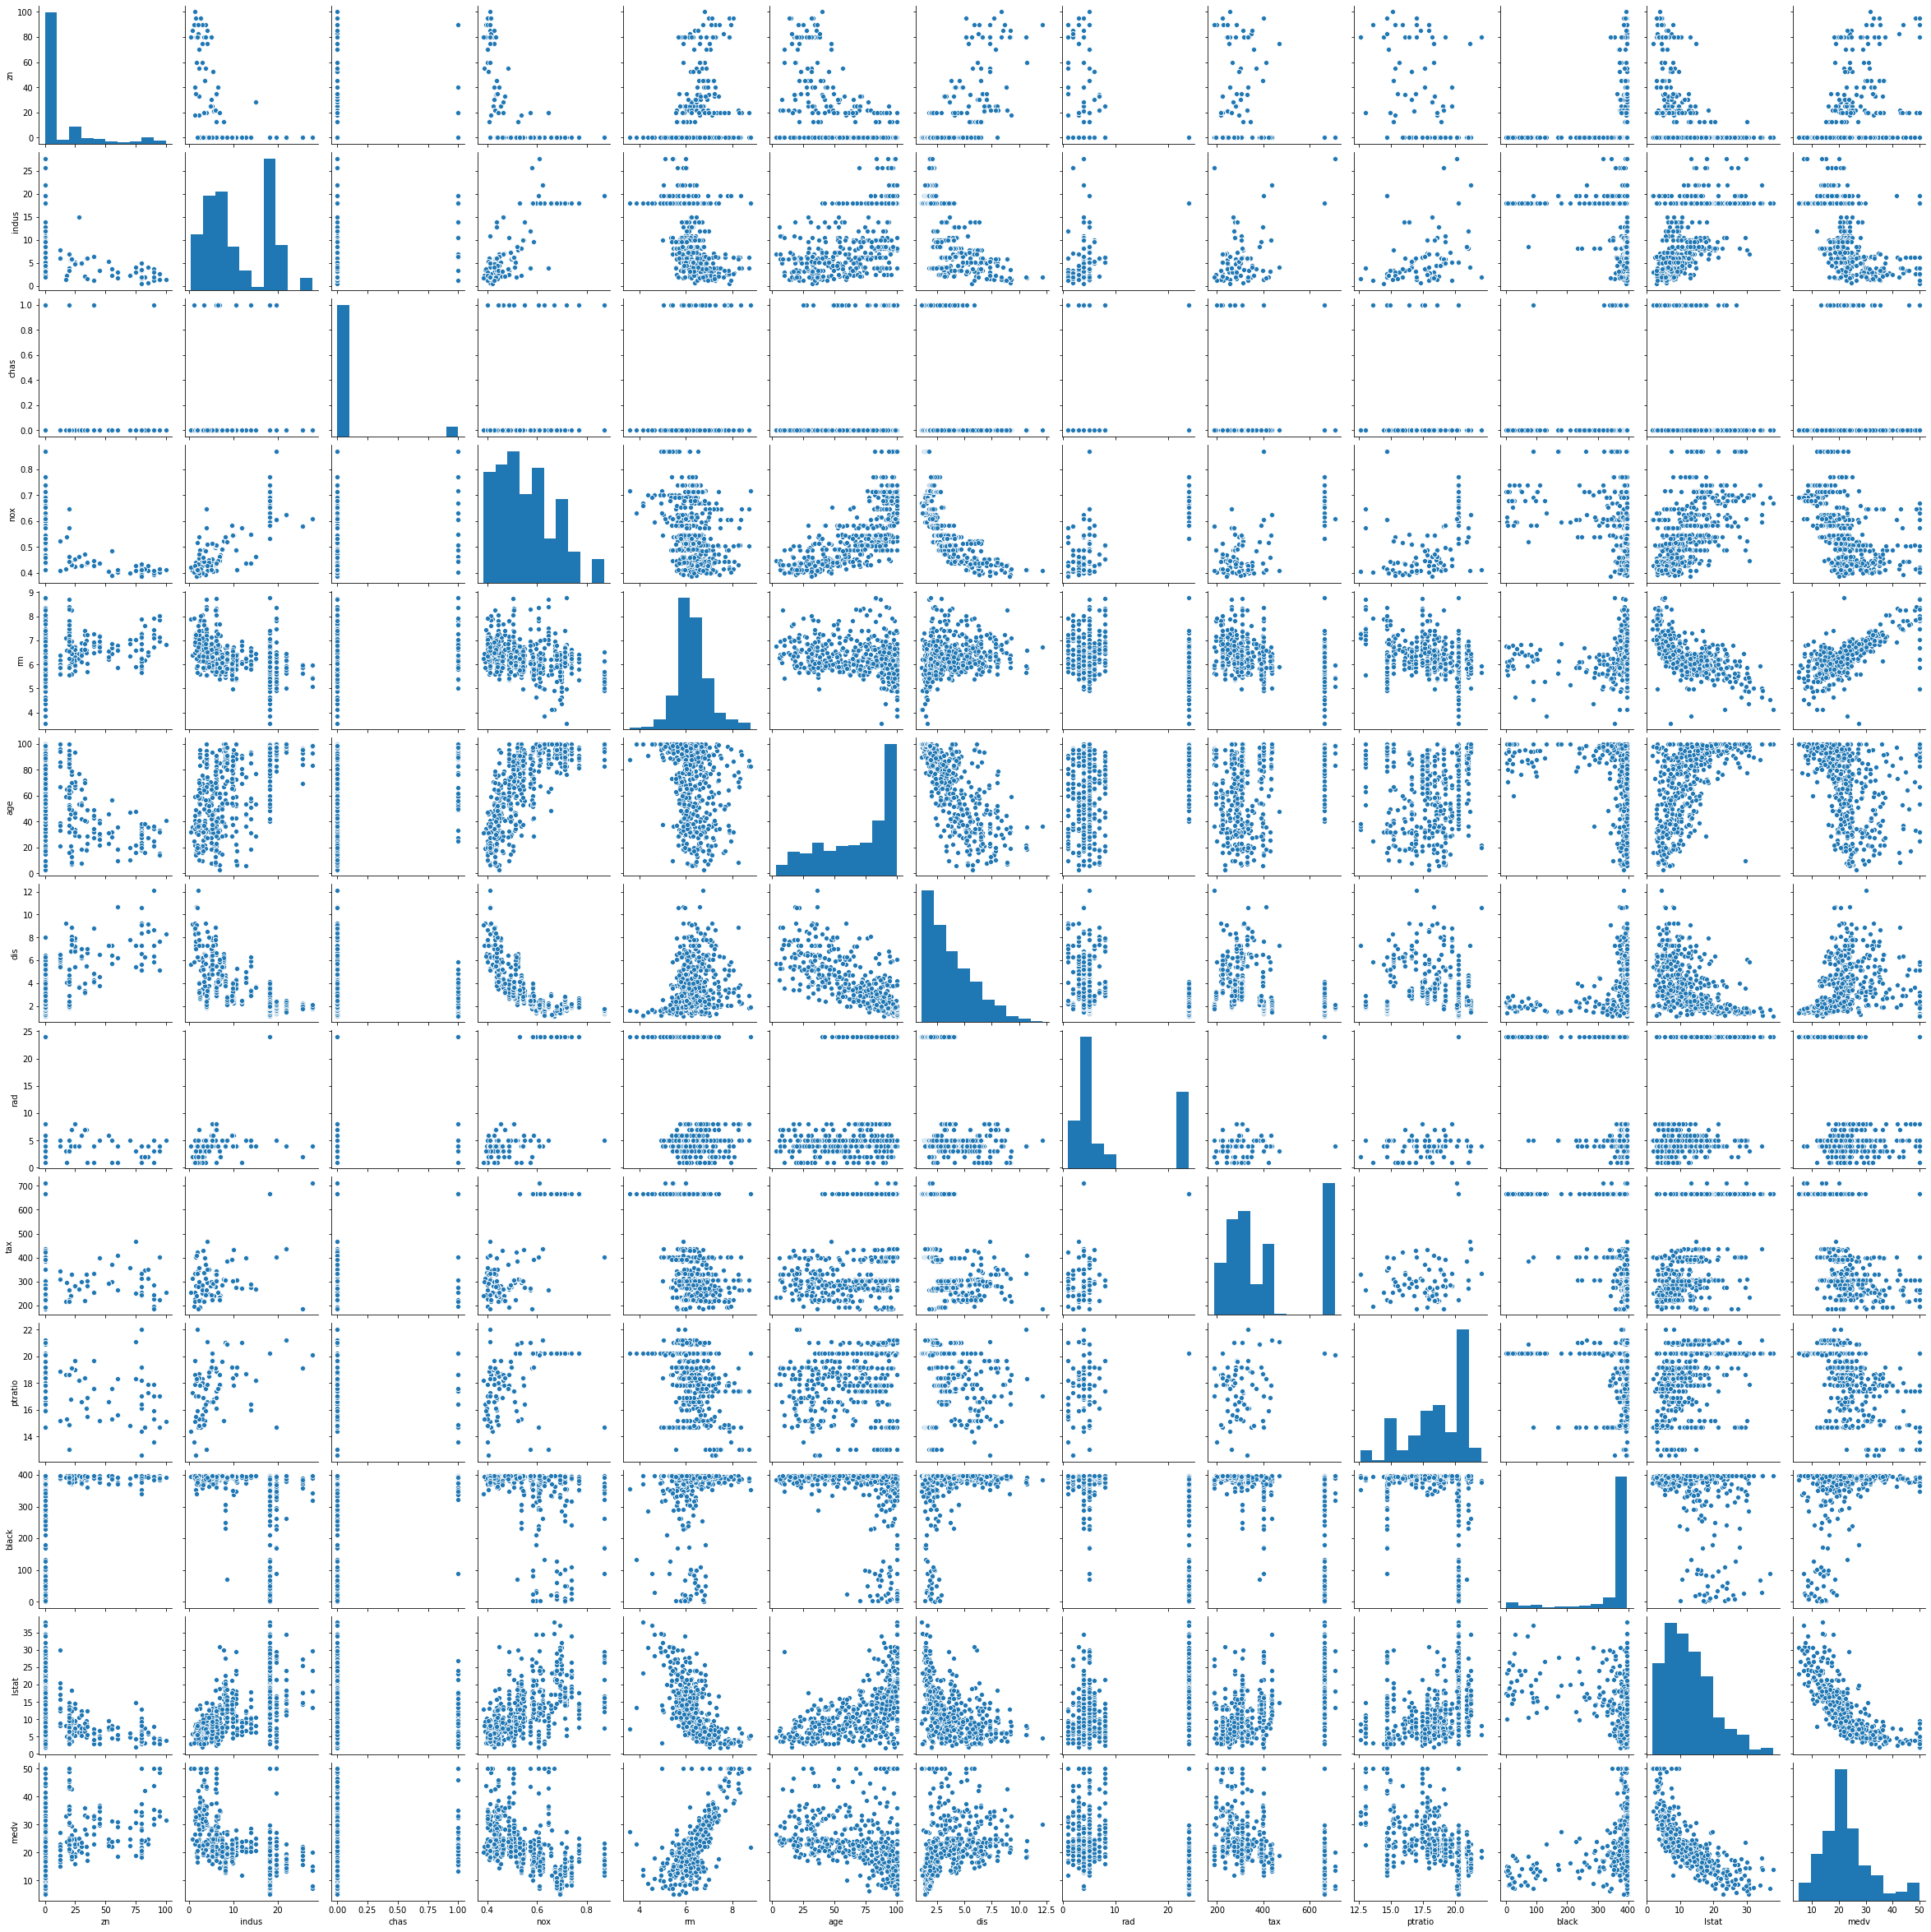

In [103]:
sns.pairplot(data=Boston.drop(columns=['crim','crim01']))

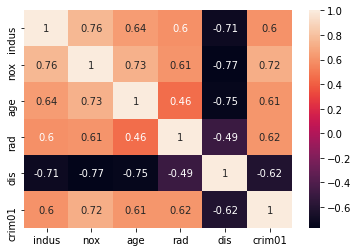

In [104]:
sns.heatmap(data=Boston[['indus','nox','age','rad','dis','crim01']].corr(),annot=True)

The most promising features seem to be :  
- indus
- nox
- age
- rad
- dis

Based on correlations, `nox`, `rad` and `age` are selected. After a bit of experimentation, `nox` and `rad` were chosen

### Modelling

In [126]:
features=['nox','rad']
X_train, X_test, y_train, y_test= train_test_split(Boston[features],Boston['crim01'],train_size=0.8)

### LDA

In [127]:
lda_model=LinearDiscriminantAnalysis().fit(X_train,y_train)

In [128]:
lda_pred=lda_model.predict(X_test)

print(confusion_matrix(y_test,lda_pred))
tn, fp, fn, tp= confusion_matrix(y_test,lda_pred).ravel()

lda_error=(tp+tn)/(tp+tn+fn+fp)
print(f'Overall Accuracy: {lda_error}')

[[55  1]
 [11 35]]
Overall Accuracy: 0.8823529411764706


### QDA

In [129]:
qda_model=QuadraticDiscriminantAnalysis().fit(X_train,y_train)

In [130]:
qda_pred=qda_model.predict(X_test)

print(confusion_matrix(y_test,qda_pred))
tn, fp, fn, tp= confusion_matrix(y_test,qda_pred).ravel()

qda_error=(tp+tn)/(tp+tn+fn+fp)
print(f'Overall Accuracy: {qda_error}')

[[56  0]
 [12 34]]
Overall Accuracy: 0.8823529411764706


### KNN

In [157]:
K=6
knn_model=KNeighborsClassifier(n_neighbors=K,).fit(X_train,y_train)

In [158]:
knn_pred=knn_model.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
tn, fp, fn, tp= confusion_matrix(y_test,knn_pred).ravel()

knn_error=(tp+tn)/(tp+tn+fn+fp)
print(f'Overall Accuracy: {knn_error}')

[[56  0]
 [ 5 41]]
Overall Accuracy: 0.9509803921568627
